Q1

In [1]:
import math
import csv
import numpy as np
import pandas as pd

In [3]:
stu_adm = pd.read_csv('student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


school_id department_id student_id student_name state location1 location2
0       001        001012   10246842          黃士玹    正1        南部      台南考區
1       001        001012   10042237          黃冠婷    正2        北部      台北考區
2       001        001012   10008031          鍾大方    正3        北部      台北考區
3       001        001012   10201525          曾信豪    正4        中部      彰化考區
4       001        001012   10014615          陳品儒    正5        北部      台北考區
5       001        001012   10294018          侯思筠    正6        東部      宜蘭考區
6       001        001012   10022810          吳悅慈    正7        北部      台北考區
7       001        001012   10236223          陳俞潔    正8        南部      台南考區
8       001        001012   10025909          蕭宇廷    正9        北部      台北考區
9       001        001012   10123708          吳岱軒   正10        北部      中壢考區

In [4]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


year school_id department_id school_name department_name category_id  \
0  106       006        006042      國立政治大學            教育學系           1   
1  106       006        006052      國立政治大學       教育學系(公費生)           1   
2  106       006        006062      國立政治大學    教育學系(原住民公費生)           1   
3  106       006        006022      國立政治大學            歷史學系           2   
4  106       006        006152      國立政治大學            民族學系           2   
5  106       006        006032      國立政治大學             哲學系           2   
6  106       006        006262      國立政治大學          英國語文學系           2   
7  106       006        006292      國立政治大學          日本語文學系           2   
8  106       006        006272      國立政治大學         阿拉伯語文學系           2   
9  106       006        006302      國立政治大學          韓國語文學系           2   

  category_name school_name_abbr department_name_abbr  
0            教育               政大                   教育  
1            教育               政大                教育(公)  
2            教育               政大              教育(原住民)  
3         藝術及人文               政大                   歷史  
4         藝術及人文               政大                  民族學  
5         藝術及人文               政大                   哲學  
6         藝術及人文               政大                 英國語文  
7         藝術及人文               政大                 日本語文  
8         藝術及人文               政大                阿拉伯語文  
9         藝術及人文               政大                 韓國語文

In [5]:
dep_id = stu_adm['department_id']
stu_id = stu_adm['student_id']
compare = pd.DataFrame({'department_id':dep_id,'stu_id':stu_id})
dum = pd.get_dummies(compare.department_id)
dum_list = dum.columns.values.tolist()
dum_to_del = []
for d in dum_list:
    if sum(dum[d]) < 10:
        dum_to_del.append(d)

In [6]:
del_ = []
for i in range(dep_id.shape[0]):
    for d in dum_to_del:
        if dep_id[i] == d:
            del_.append(i)
# a_del_dep_id = dep_id[dep_id != ]
# print(a_del_dep_id)

In [7]:
d_id = dep_id.drop(del_)
d_dum = pd.get_dummies(d_id)

In [8]:
m_id = pd.concat([d_dum, stu_id], axis = 1)

In [9]:
mat_id = m_id.groupby(stu_id).sum()

In [10]:
# print(mat_id)
indexs = []
for i in mat_id.index:
    if sum(mat_id.loc[i]) < 2:
        indexs.append(i)
matr_id = mat_id.drop(indexs)
print(matr_id.shape)

(47420, 1931)


In [11]:
matri_id = matr_id.T
print(matri_id.shape)
print(matri_id.head(10))

(1931, 47420)
student_id  10000101  10000110  10000111  10000112  10000114  10000116  \
001012           0.0       0.0       0.0       0.0       0.0       0.0   
001022           0.0       0.0       0.0       0.0       0.0       0.0   
001032           0.0       0.0       0.0       0.0       0.0       0.0   
001042           0.0       0.0       0.0       0.0       0.0       0.0   
001052           0.0       0.0       0.0       0.0       0.0       0.0   
001062           0.0       0.0       0.0       0.0       0.0       0.0   
001072           0.0       0.0       0.0       0.0       0.0       0.0   
001082           0.0       0.0       0.0       0.0       0.0       0.0   
001092           0.0       0.0       0.0       0.0       0.0       0.0   
001102           0.0       0.0       0.0       0.0       0.0       0.0   

student_id  10000120  10000121  10000125  10000126  ...  19710702  19710703  \
001012           0.0       0.0       0.0       0.0  ...       0.0       0.0   
001022       

1.
<br>number of academic departments: 1931
<br>student applicants: 47432

In [12]:
from operator import itemgetter, attrgetter
x = []
for i in range(1931):
    x.append(np.sum(matri_id.iloc[i]))
name = matri_id.index
zzzzzz = zip(name, x)
top_ten = sorted(zzzzzz, key = itemgetter(1),reverse = True)[:10]
print(top_ten)

[('008122', 386.0), ('012052', 377.0), ('046032', 367.0), ('004382', 357.0), ('005192', 353.0), ('008112', 353.0), ('005182', 351.0), ('015342', 340.0), ('045012', 339.0), ('015222', 329.0)]


In [13]:
tt, trash =  zip(*top_ten)
for stri in tt:
    print(uname[uname["department_id"] == stri])

    year school_id department_id school_name department_name category_id  \
976  106       008        008122        中原大學          機械工程學系           7   

    category_name school_name_abbr department_name_abbr  
976      工程、製造及營建               中原                機械工程學  
     year school_id department_id school_name department_name category_id  \
1764  106       012        012052      中國醫藥大學             藥學系           9   

     category_name school_name_abbr department_name_abbr  
1764     醫藥衛生及社會福利               中醫                   藥學  
     year school_id department_id school_name department_name category_id  \
1444  106       046        046032        銘傳大學      會計學系（臺北校區）           4   

     category_name school_name_abbr department_name_abbr  
1444      商業、管理及法律               銘傳               會計（臺北）  
    year school_id department_id school_name department_name category_id  \
210  106       004        004382      國立成功大學          電機工程學系           7   

    category_name school_name_ab

2.
<br>The top ten departments that received the most applications and the number of applications they received

department id|school name|department name| number of applications received
-------|:-----:|:-----:|:-----:
008122 |中原大學|機械工程學系| 386 
012052 |中國醫藥大學|藥學系| 377
046032 |銘傳大學|會計學系（臺北校區）| 367 
004382 |國立成功大學|電機工程學系| 357 
005192 |東吳大學|企業管理學系| 353
008112 |中原大學|土木工程學系| 353  
005182 |東吳大學|會計學系| 351
015342 |逢甲大學|財務金融學系| 340
045012 |義守大學|電機工程學系| 339
015222 |逢甲大學|資訊工程學系| 329

Q2

1.

In [14]:
from sklearn.decomposition import PCA
pca2_1 = PCA(n_components=8)
pca2_1.fit(matri_id)
x_pca2_1 = pca2_1.transform(matri_id)

print(matri_id.shape)
print(x_pca2_1.shape)

(1931, 47420)
(1931, 8)


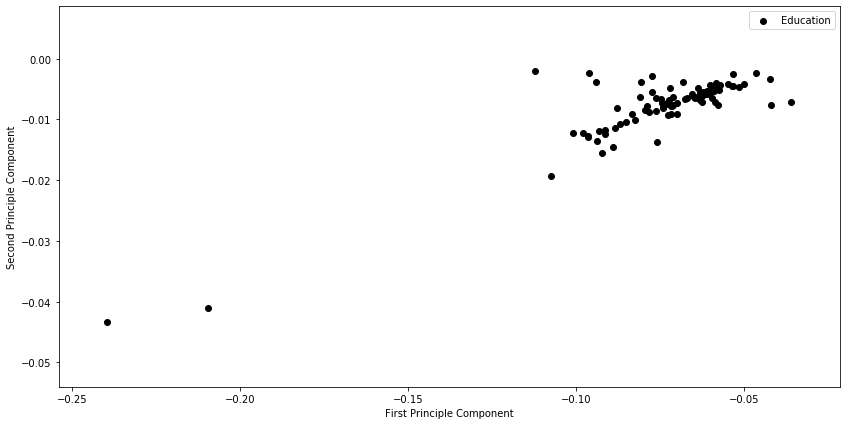

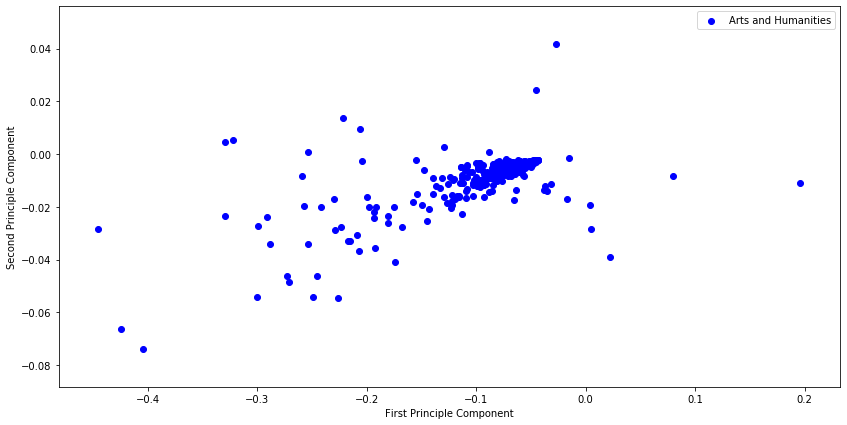

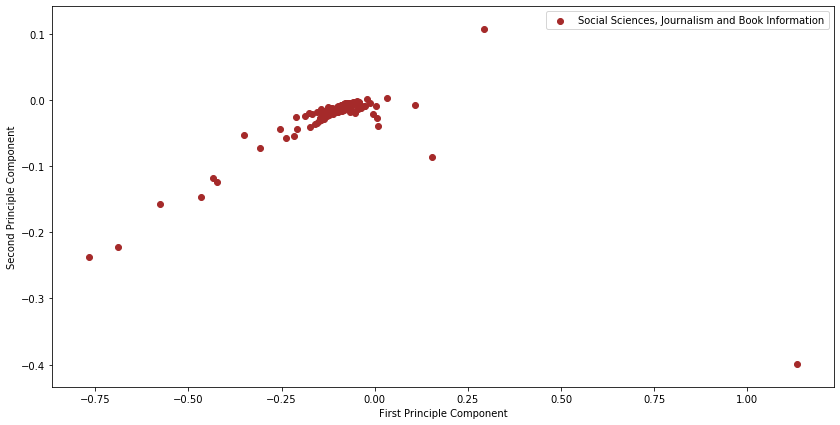

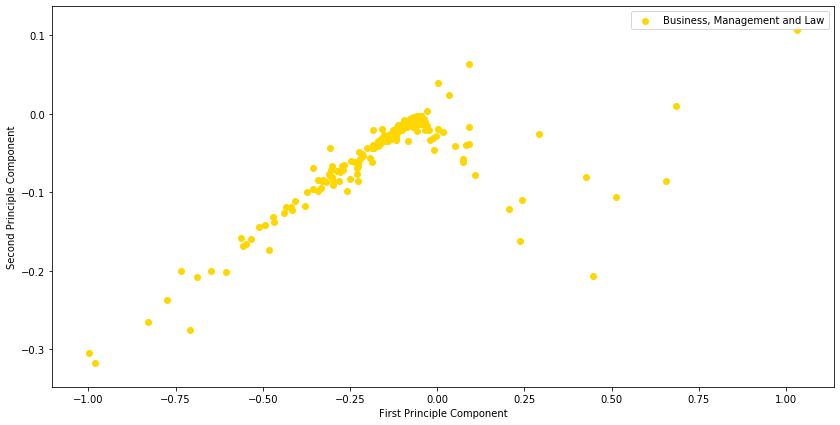

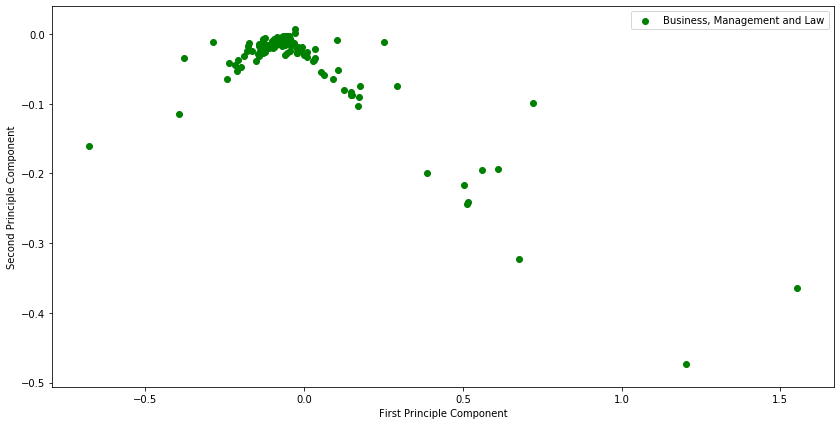

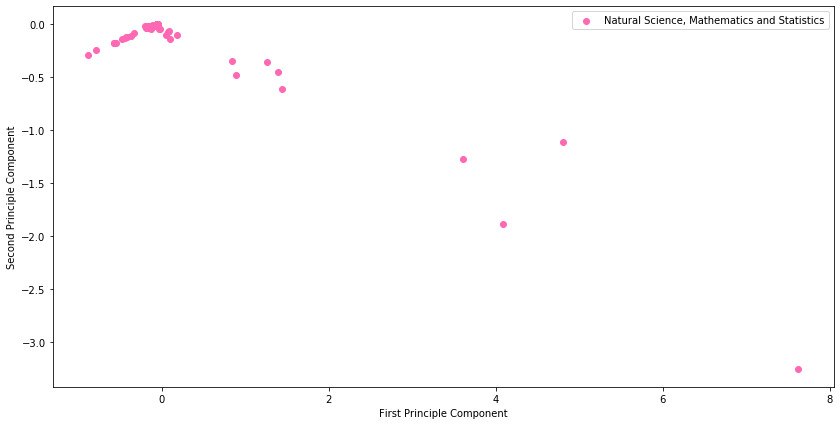

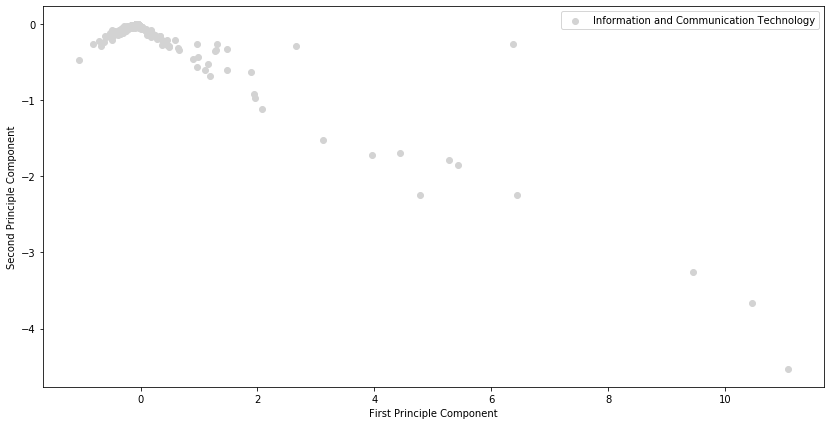

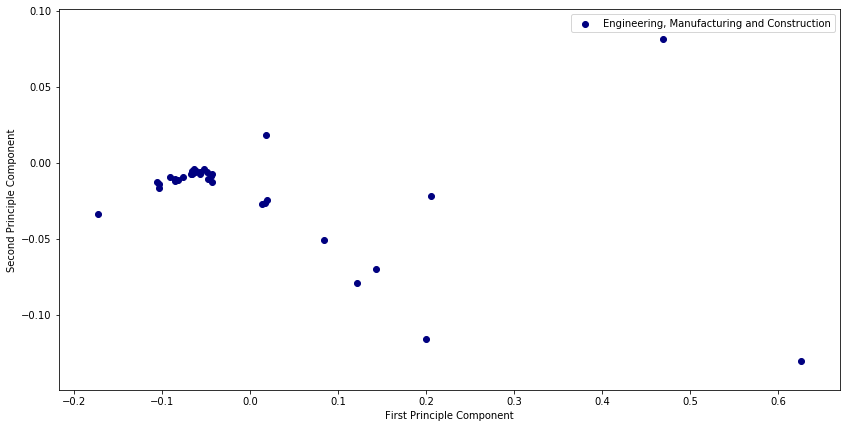

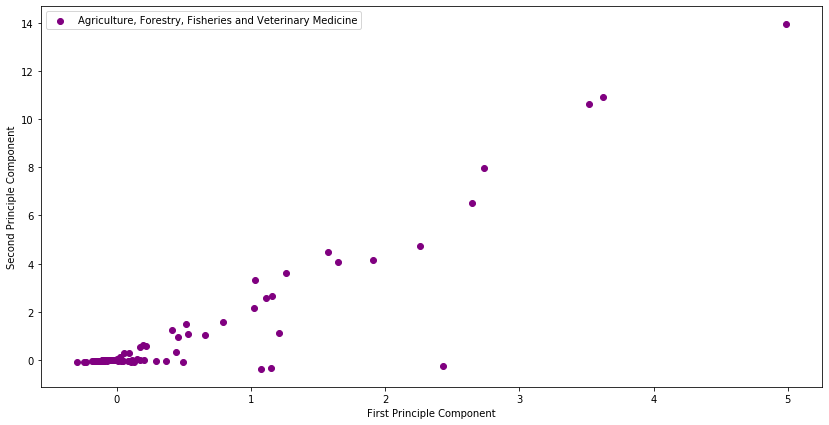

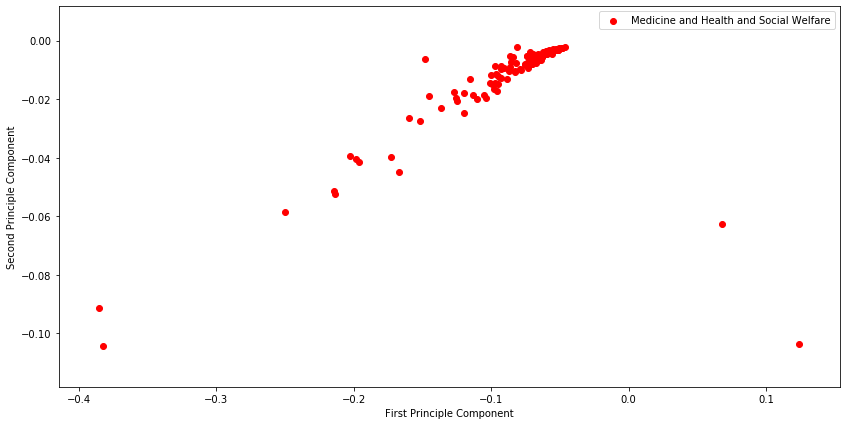

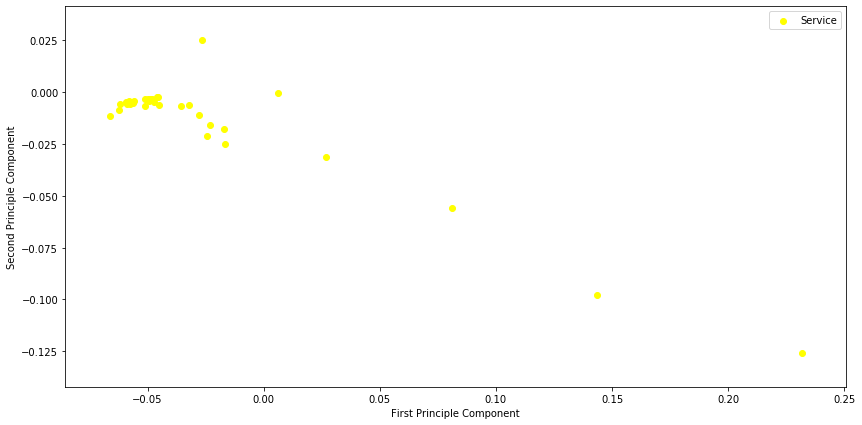

In [15]:
import matplotlib.pyplot as plt
# import matplotlib
# chinese =matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
cat_l = ['1','2','3','4','5','6','7','8','9','10','99']
catn_l = [
'Education', 'Arts and Humanities', 'Social Sciences, Journalism and Book Information', 'Business, Management and Law', 'Business, Management and Law', 'Natural Science, Mathematics and Statistics',
         'Information and Communication Technology', 'Engineering, Manufacturing and Construction', 'Agriculture, Forestry, Fisheries and Veterinary Medicine', 'Medicine and Health and Social Welfare', 'Service', 'Other']
color_l = ['black','blue','brown','gold','green','hotpink','lightgray','navy','purple','red','yellow']
# for cat in cat_l:
#     print(uname[uname['category_id'] == str(cat)].head(1))
for h in range(len(cat_l)):
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,x_pca2_1.T)).T
    list2_1 = uname[uname['category_id'] == str(cat_l[h])]
    list2_1_ = np.array(list2_1['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_1_)):
            if D[i][0] == list2_1_[j]:
                to_.append(i)
    resx2_1 = x_pca2_1[to_]
#     print(resx2_1.shape)
    plt.figure(figsize=(14,7))
    plt.scatter(resx2_1[:,0],resx2_1[:,1], c = color_l[h])
    plt.legend([catn_l[h]])
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
# plt.show()    

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


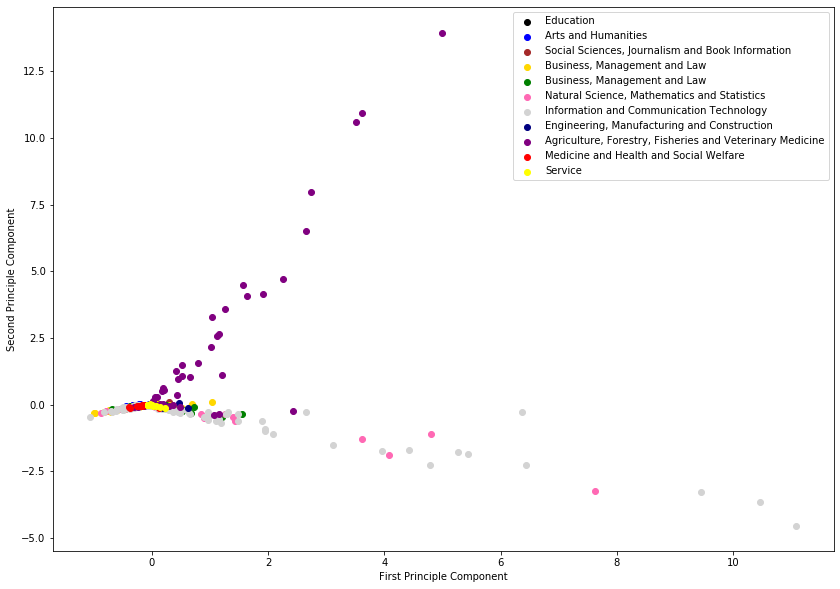

In [17]:
figg = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,x_pca2_1.T)).T
    list2_1 = uname[uname['category_id'] == str(cat_l[h])]
    list2_1_ = np.array(list2_1['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_1_)):
            if D[i][0] == list2_1_[j]:
                to_.append(i)
    resx2_1 = x_pca2_1[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_1[:,0],resx2_1[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
figg.show()

Each visual pattern respect to department categories looks roughly linear.
<br>However, there is a lot of overlap after being together.

2.

In [56]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(matri_id)

metric settings


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


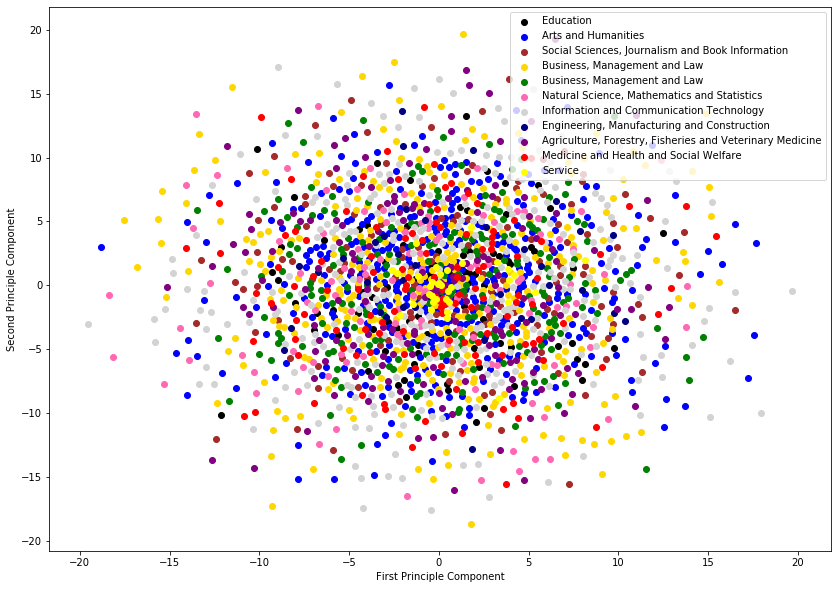

In [57]:
fig = plt.figure(figsize=(14,10))
print("metric settings")
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed.T)).T
    list2_2 = uname[uname['category_id'] == str(cat_l[h])]
    list2_2_ = np.array(list2_2['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_2_)):
            if D[i][0] == list2_2_[j]:
                to_.append(i)
    resx2_2 = X_transformed[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_2[:,0],resx2_2[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
fig.show()

In [58]:
embedding_2 = MDS(n_components=2,metric=False)
X_transformed_2 = embedding_2.fit_transform(matri_id)
# metric and non-metric settings

non-metric settings


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


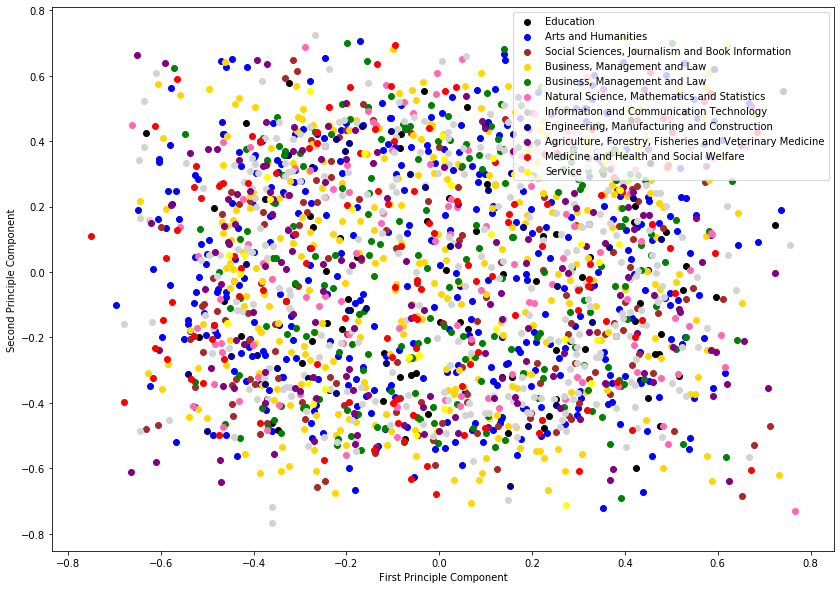

In [59]:
fig_2 = plt.figure(figsize=(14,10))
print("non-metric settings")
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed_2.T)).T
    list2_2_2 = uname[uname['category_id'] == str(cat_l[h])]
    list2_2_2_ = np.array(list2_2_2['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_2_2_)):
            if D[i][0] == list2_2_2_[j]:
                to_.append(i)
    resx2_2_2 = X_transformed_2[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_2_2[:,0],resx2_2_2[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
fig_2.show()

Compare to the scatter graph that metric = false, the metric = true graph's points behave more closer to center.
<br>
However, it is hard to distinguish different groups.

3.

(a)

In [60]:
from sklearn.manifold import LocallyLinearEmbedding
embedding2_3_a = LocallyLinearEmbedding(n_neighbors=20, n_components=2)
X_transformed2_3_a = embedding2_3_a.fit_transform(matri_id)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


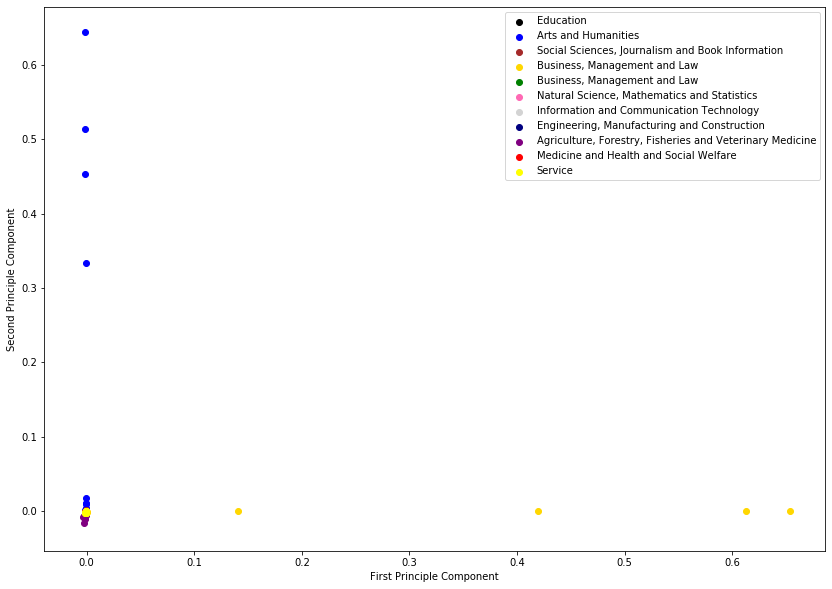

In [61]:
fig_2_3_a = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed2_3_a.T)).T
    list2_3_a = uname[uname['category_id'] == str(cat_l[h])]
    list2_3_a_ = np.array(list2_3_a['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_3_a_)):
            if D[i][0] == list2_3_a_[j]:
                to_.append(i)
    resx2_3_a = X_transformed2_3_a[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_3_a[:,0],resx2_3_a[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
fig_2_3_a.show()

(b)

In [62]:
embedding2_3_b = LocallyLinearEmbedding(n_neighbors=40, n_components=2)
X_transformed2_3_b = embedding2_3_b.fit_transform(matri_id)

KeyboardInterrupt: 

In [ ]:
fig_2_3_b = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed2_3_b.T)).T
    list2_3_b = uname[uname['category_id'] == str(cat_l[h])]
    list2_3_b_ = np.array(list2_3_b['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_3_b_)):
            if D[i][0] == list2_3_b_[j]:
                to_.append(i)
    resx2_3_b = X_transformed2_3_b[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_3_b[:,0],resx2_3_b[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
fig_2_3_b.show()

(c)

In [63]:
pca2_3 = PCA(n_components=100)
pca2_3.fit(matri_id)
x_pca2_3 = pca2_3.transform(matri_id)

In [64]:
embedding2_3_c = LocallyLinearEmbedding(n_neighbors=20, n_components=2)
X_transformed2_3_c = embedding2_3_c.fit_transform(x_pca2_3)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


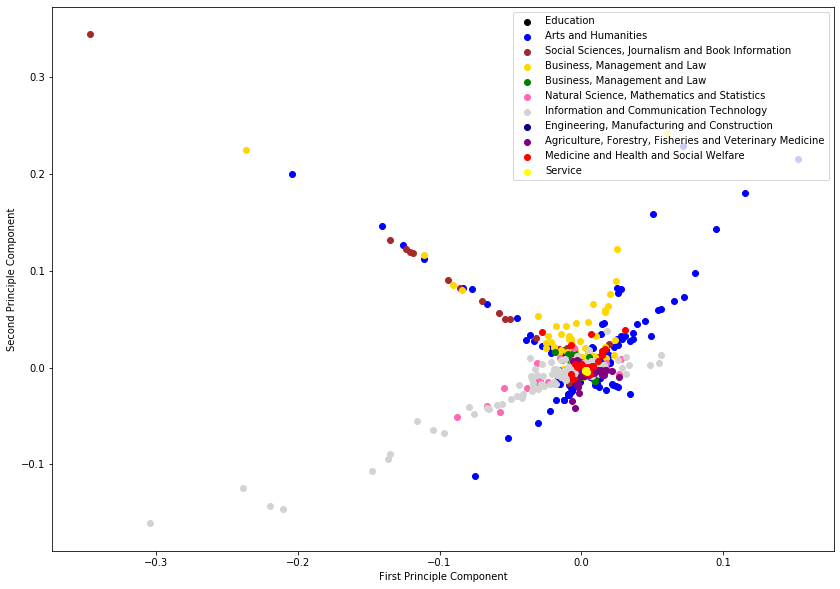

In [65]:
fig_2_3_c = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed2_3_c.T)).T
    list2_3_c = uname[uname['category_id'] == str(cat_l[h])]
    list2_3_c_ = np.array(list2_3_c['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_3_c_)):
            if D[i][0] == list2_3_c_[j]:
                to_.append(i)
    resx2_3_c = X_transformed2_3_c[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_3_c[:,0],resx2_3_c[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
fig_2_3_c.show()

With only doing LLE, (a) and (b) present L-shape graphs, which means that the size if a component has no effect on the other.
<br>
with doing LLE after doing pca, the graph (c) is has more correlation between the two component.
<br>
Overlapping exist in the three way.

4.

In [66]:
from sklearn.decomposition import KernelPCA
transformer2_4_r = KernelPCA(n_components=2, kernel='rbf')
X_transformed2_4_r = transformer2_4_r.fit_transform(matri_id)

RBF kernel


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


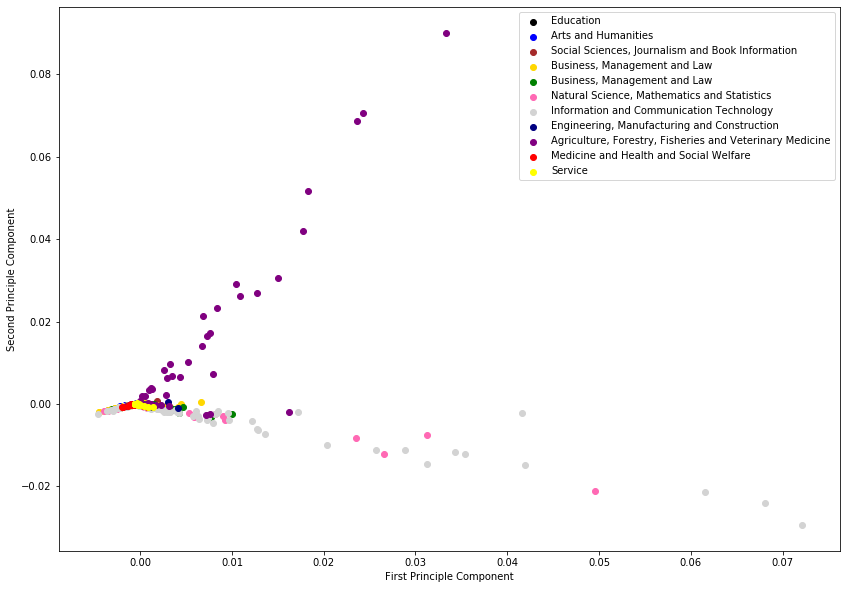

In [67]:
fig_2_4_r = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed2_4_r.T)).T
    list2_4_r = uname[uname['category_id'] == str(cat_l[h])]
    list2_4_r_ = np.array(list2_4_r['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_4_r_)):
            if D[i][0] == list2_4_r_[j]:
                to_.append(i)
    resx2_4_r = X_transformed2_4_r[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_4_r[:,0],resx2_4_r[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
print('RBF kernel')
fig_2_4_r.show()

In [68]:
transformer2_4_c = KernelPCA(n_components=2, kernel='cosine')
X_transformed2_4_c = transformer2_4_c.fit_transform(matri_id)

cosine kernel


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


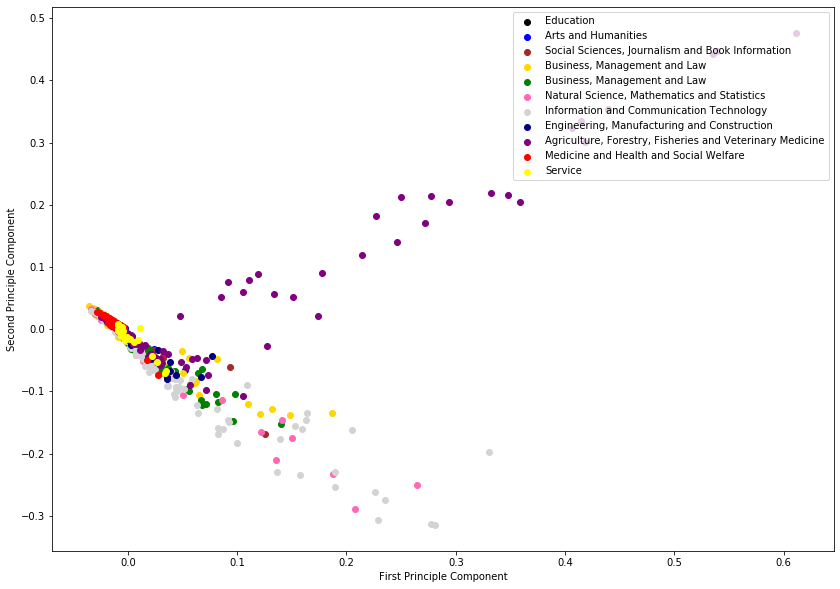

In [69]:
fig_2_4_c = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_transformed2_4_c.T)).T
    list2_4_c = uname[uname['category_id'] == str(cat_l[h])]
    list2_4_c_ = np.array(list2_4_c['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_4_c_)):
            if D[i][0] == list2_4_c_[j]:
                to_.append(i)
    resx2_4_c = X_transformed2_4_c[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_4_c[:,0],resx2_4_c[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
print('cosine kernel')
fig_2_4_c.show()

The two method doing different kernel pca look similar.
<br>
Agriculture, Forestry, Fisheries and Veterinary Medicine is the group presents the most related between the two component.
<br>
However, overlapping exists.

5.

In [18]:
from sklearn.manifold import TSNE
import random
random.seed(330)
X_embedded5_e = TSNE(n_components=2).fit_transform(matri_id)

Euclidian


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


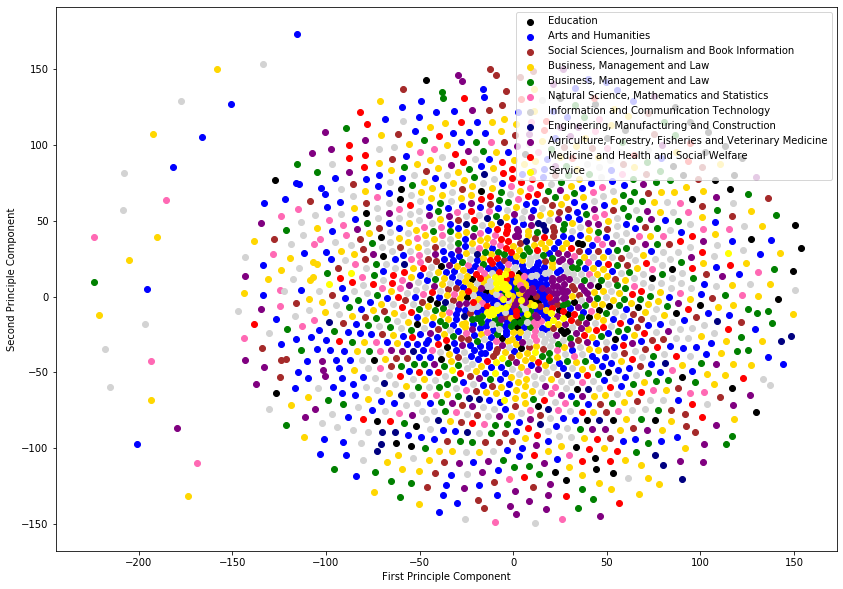

In [19]:
fig_2_5_e = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_embedded5_e.T)).T
    list2_5_e = uname[uname['category_id'] == str(cat_l[h])]
    list2_5_e_ = np.array(list2_5_e['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_5_e_)):
            if D[i][0] == list2_5_e_[j]:
                to_.append(i)
    resx2_5_e = X_embedded5_e[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_5_e[:,0],resx2_5_e[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
print('Euclidian')
fig_2_5_e.show()

In [20]:
random.seed(330)
X_embedded5_c = TSNE(n_components=2, metric='cosine').fit_transform(matri_id)

Cosine


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


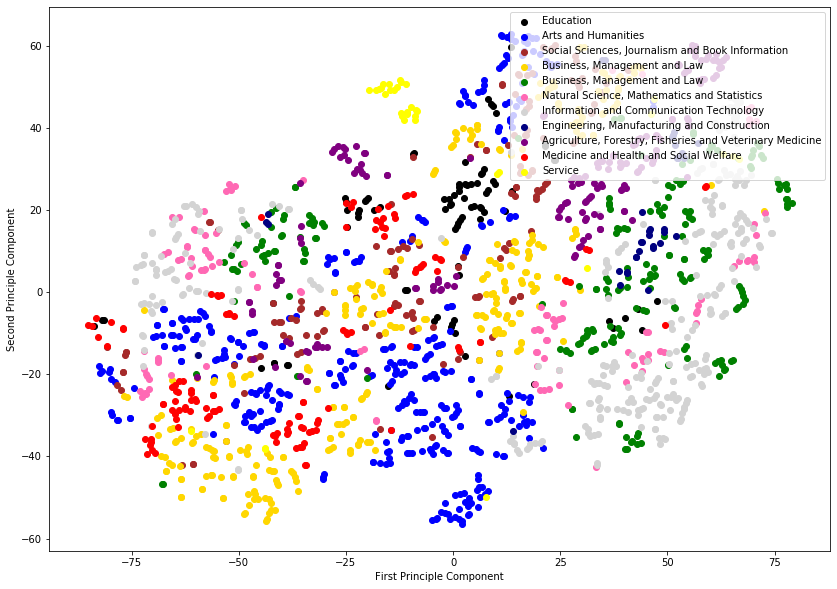

In [21]:
fig_2_5_c = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_embedded5_c.T)).T
    list2_5_c = uname[uname['category_id'] == str(cat_l[h])]
    list2_5_c_ = np.array(list2_5_c['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_5_c_)):
            if D[i][0] == list2_5_c_[j]:
                to_.append(i)
    resx2_5_c = X_embedded5_c[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_5_c[:,0],resx2_5_c[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
print('Cosine')
fig_2_5_c.show()

In [22]:
random.seed(330)
X_embedded5_j = TSNE(n_components=2, metric='jaccard').fit_transform(matri_id)

Jaccard


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


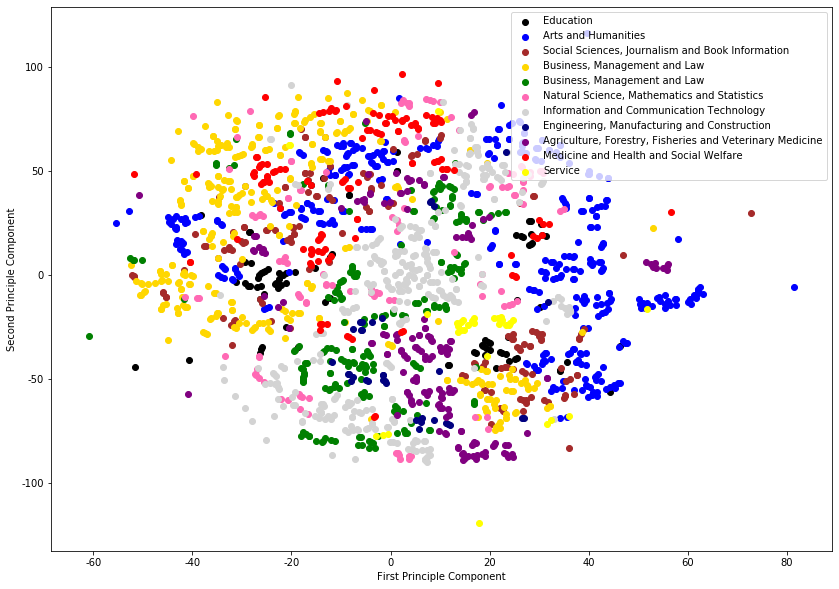

In [89]:
fig_2_5_j = plt.figure(figsize=(14,10))
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_embedded5_j.T)).T
    list2_5_j = uname[uname['category_id'] == str(cat_l[h])]
    list2_5_j_ = np.array(list2_5_j['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list2_5_j_)):
            if D[i][0] == list2_5_j_[j]:
                to_.append(i)
    resx2_5_j = X_embedded5_j[to_]
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
    plt.scatter(resx2_5_j[:,0],resx2_5_j[:,1], c = color_l[h], label=catn_l[h])
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
print('Jaccard')
fig_2_5_j.show()

t-SNE with Euclidian metric is hard to distinguish different groups.
<br>
For t-SNE with Cosine and Jaccard metric, overlapping is fewer than others, we can distinguish different groups. So, I choose t-SNE with Cosine metric for my Q3.

Q3.

TSNE Cosine


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


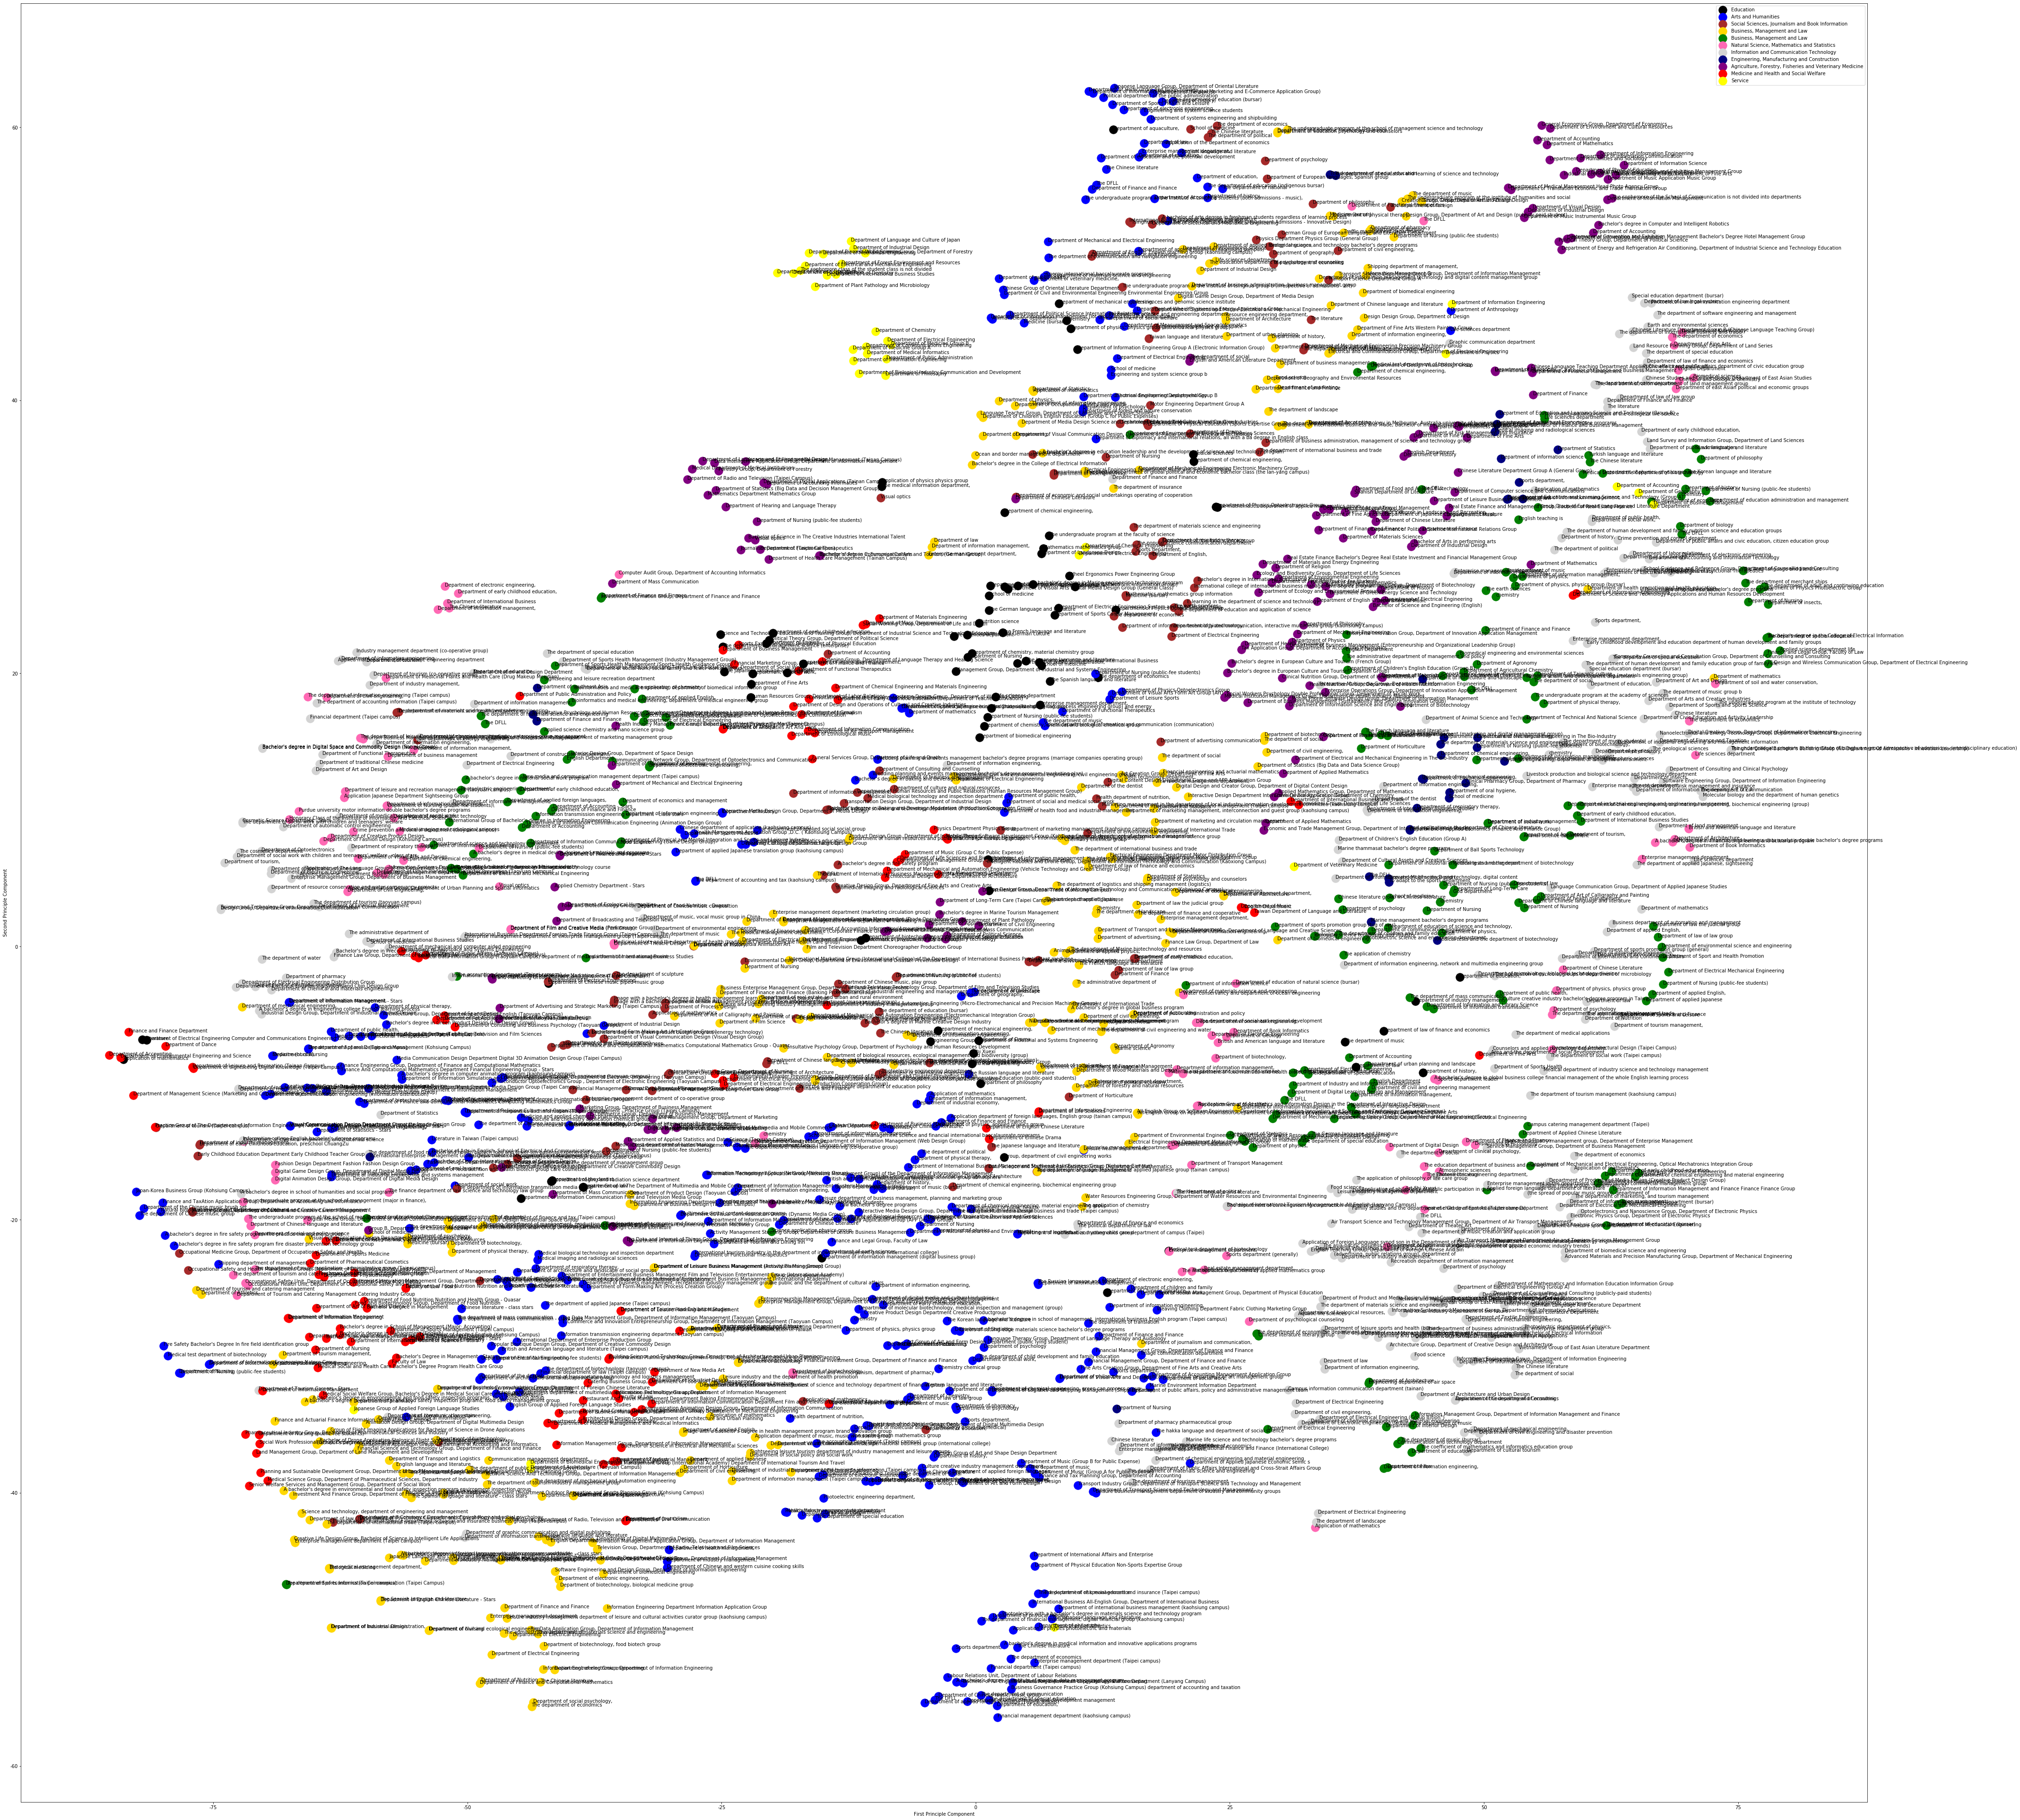

In [117]:
# import matplotlib.font_manager as mf
# my_font = mf.FontProperties(fname='C:\\Users\黃啟宏\AppData\Local\Programs\Python\Python37\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\SimHei.ttf')
fig_3 = plt.figure(figsize=(70,70))
# len(cat_l)
# dep_name = [
#    [
#        'Department of Chemistry', 'Physics Group of the Department of Physics (Astronomy and Physics Group)', 'Photoelectric Physics Group of the Department of Physics',' Bachelor Class of the College of Science ',' Mathematical Coefficients Group ',' Applied Mathematics Group of the Mathematics Department ',' Department of Information Engineering Group A (Electronic Information Group) ',' Information Engineering Department Group B (Information Engineering Group) ',' Department of Chemical Engineering ',' Department of Medical Science ',' Political Theory Group of Political Science ',' Department of Mechanical Engineering ',' Department of Life Science ',' Department of Marine Engineering\'s Power Engineering Group ',' Bachelor\'s Degree in Marine Engineering Science and Technology ',' Bioscience Group of Food Science Department ',' Department of Aquaculture ',' Industry Department of Science and Technology Education, Science and Technology Education and Training Group, Department of Physical Therapy and Assisted Science and Technology, Department of Chinese Music, Guanle Group, Department of Drama, Department of Biotechnology, Department of Sports and Health Science ',' Sports Career Management Department ',' Education Department ',' Infant Education Department ',' Visual Art Coefficient Media Design Group (General) ',' Applied Physics Department Physics Group ',' Applied Mathematics Department ',' Finance and International Business Department ',' Corporate Management Department ',' Law Department ',' Finance Law Department ',' Life Science Department ',' Nutrition Science Department ',' Information Management Department ', 'Computer and Communication Engineer, Department of Electrical Engineering Group ',' Electrical Engineering Department System and Chip Design Group ',' Food Science Department ',' Landscape Design Department ',' Medical Department ',' Dining and Tourism Management Department ',' Musicology Department ',' History Department ',' English Department ',' Japanese Language and Literature Department ',' German Culture Department ',' Chinese Literature Department ',' Social Work Department ',' Mechanical Engineering Department ',' Industrial and Systems Engineering Department Engineering Group ',' Industrial and Systems Engineering Department Management Group ',' Biomedical Engineering Department ',' Japanese Language and Literature Department ',' Spanish Literature Department ',' German Language and Literature Department ',' French Language and Literature Department ' , 'Department of Chinese Literature', 'Department of Economics',' Department of Management Science (Business Management Group) ',' Department of Public Administration ',' Chemistry Department of Chemistry and Biochemistry Group ',' Material Chemistry of the Department of Chemistry Group ',' Physics Department Photoelectric Physics Group ',' Civil Engineering Department Engineering Facilities Group ',' Art Department ',' Music Department ',' Drama Department ',' History Department ',' Philosophy Department ', 'Labor Relations Department Human Resources Group', 'Chemical Engineering Department', 'Information Management Department (Digital Management Group)', 'Information Management Department Internet of Things Application Group (Kaohsiung Campus)', 'Information Technology and Communication Department App Design Group (Kaohsiung Campus) ',' Dental Medicine Department ',' Foreign Language and Literature Department ',' Literature Department ',' Medical Department ',' Nursing Department ',' Nursing Department (publicly funded students) ',' Medical Laboratory Biotechnology Department ',' Medical Informatics Department ',' Biomedical Imaging and Radiology 'Science Department', 'Information Communication Department Film and Television Media Group', 'Multimedia and Mobile Business Department Creative Group', 'Legal Department
#    ]
    
# ]
file_name = ['f1.csv','f2.csv','f3.csv','f4.csv','f5.csv','f6.csv','f7.csv','f8.csv','f9.csv','f10.csv','f99.csv']
for h in range(len(cat_l)):
#     print(h)
    depa_id = np.array(matri_id.index)
    D = np.vstack((depa_id,X_embedded5_c.T)).T
    list3 = uname[uname['category_id'] == str(cat_l[h])]
    list3_ = np.array(list3['department_id'])
    to_ = []
    for i in range(len(D)):
        for j in range(len(list3_)):
            if D[i][0] == list3_[j]:
                to_.append(i)
    resx3 = X_embedded5_c[to_]
#     ddd_id = depa_id[to_]
#     d_name = uname.iloc[to_]
    d_name = pd.read_csv(file_name[h], encoding='utf-8')
#     print(d_name)
    dd_name = np.array([d_name['eng']])[0]
#     print(dd_name)
#     for i in range(len(dd_name)):
#         print("\',\'", end = "")
#         print(dd_name[i], end = "")
#     print("\',\'")
#     d_name['department_name'].to_csv(file_name[h],encoding="utf_8_sig")
#     a = []
#     for i in range(len(dd_name)):
#         a.append(translator.translate(dd_name[i]))
#     print(resx2_1.shape)
#     plt.figure(figsize=(4,3))
#     print(len(dd_name))
    plt.scatter(resx3[:,0],resx3[:,1], s= 300, c = color_l[h], label=catn_l[h])
    for i in range(len(dd_name)):
        plt.annotate(dd_name[i], (resx3[:,0][i], resx3[:,1][i]))
plt.legend(loc='upper right')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')    
print('TSNE Cosine')
fig_3.savefig('HW4_3.png')
fig_3.show()

With adding the department with English(transform the language by csv), we can know that the points distribute closes to those in the same category.